In [1]:
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
#from sklearn import preprocessing as pp
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

#Read IMU data csv file
imu_data = pd.read_csv('imu.csv')

#data scaling and dataset setting
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
#I changed scale(imu_data) to DF(imu_data, ..) like this to compare data varying scale(imu) and original IMU. 
dataset = pd.DataFrame(imu_data, columns=imu_data.columns)
dataset_s = pd.DataFrame(standard_scaler.fit_transform(imu_data), columns=imu_data.columns)
dataset_r = pd.DataFrame(robust_scaler.fit_transform(imu_data), columns=imu_data.columns)

In [2]:
'''
col_1 = dataset['au']
smooth = []
smooth = pd.DataFrame(data=smooth)
bump = []
bump = pd.DataFrame(data=bump)

# Making label to the group. Divided into "smooth" and "bump" group. 
for i in range(len(col_1)):
    if col_1[i] > 10.2 or col_1[i] < 9.3:
        col_1.append(bump)
    else:
        col_1.append(smooth)
'''

'\ncol_1 = dataset[\'au\']\nsmooth = []\nsmooth = pd.DataFrame(data=smooth)\nbump = []\nbump = pd.DataFrame(data=bump)\n\n# Making label to the group. Divided into "smooth" and "bump" group. \nfor i in range(len(col_1)):\n    if col_1[i] > 10.2 or col_1[i] < 9.3:\n        col_1.append(bump)\n    else:\n        col_1.append(smooth)\n'

In [3]:
#Clustering: PCA
pca = PCA(n_components=2)
pca_s = PCA(n_components=2)
pca_r = PCA(n_components=2)
pca.fit(dataset)
pca_r.fit(dataset_r)
pca_s.fit(dataset_s)

#Dimensionality Reduction
X_pca = pca.transform(dataset)
Xs_pca = pca_s.transform(dataset_s)
Xr_pca = pca_r.transform(dataset_r)
print("원본 데이터 형태: {}".format(str(dataset.shape)))
print("원본 Standard Scale 데이터 형태: {}".format(str(dataset_s.shape)))
print("원본 Robust Scale 데이터 형태: {}".format(str(dataset_r.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))
print("축소된 데이터 형태 (Standard Scale): {}".format(str(Xs_pca.shape)))
print("축소된 데이터 형태 (Robust Scale): {}".format(str(Xr_pca.shape)))

원본 데이터 형태: (340, 2)
원본 Standard Scale 데이터 형태: (340, 2)
원본 Robust Scale 데이터 형태: (340, 2)
축소된 데이터 형태: (340, 2)
축소된 데이터 형태 (Standard Scale): (340, 2)
축소된 데이터 형태 (Robust Scale): (340, 2)


Text(0.5, 1.0, 'Just sklearn scale PCA')

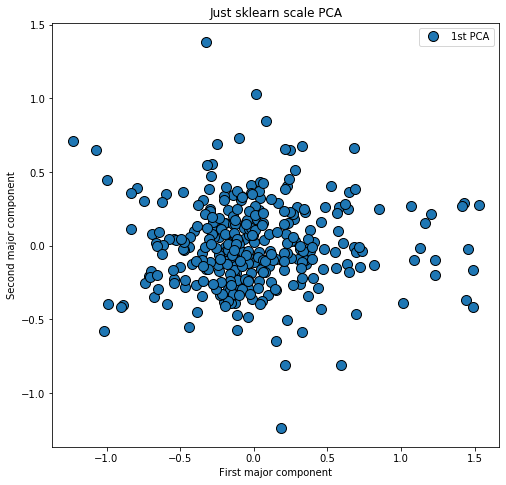

In [4]:
%matplotlib inline
import mglearn

#PCA dimension reduced with sklearn-scale
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1])
plt.legend(["1st PCA", "2nd PCA"], loc="best")

plt.gca().set_aspect("equal")
plt.xlabel("First major component")
plt.ylabel("Second major component")
plt.title("Just sklearn scale PCA")
#plt.savefig("scale.png")

Text(0.5, 1.0, 'PCA (the Standard Scale)')

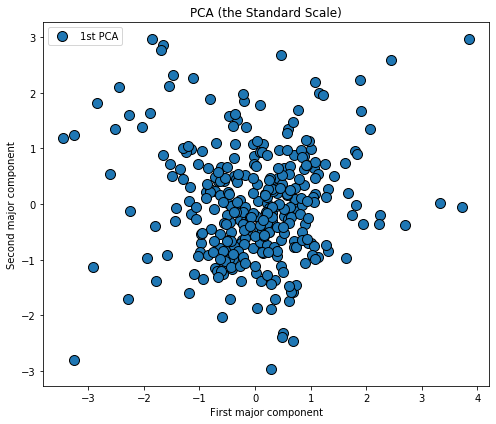

In [5]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(Xs_pca[:, 0], Xs_pca[:, 1])
plt.legend(["1st PCA", "2nd PCA"], loc="best")

plt.gca().set_aspect("equal")
plt.xlabel("First major component")
plt.ylabel("Second major component")
plt.title("PCA (the Standard Scale)")
#plt.savefig("Standard_Scale.png")

Text(0.5, 1.0, 'PCA (the Robust Scale)')

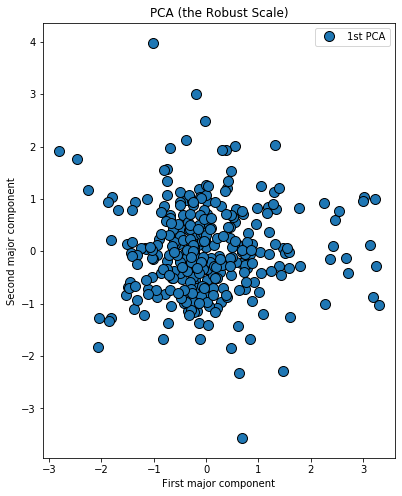

In [6]:
#PCA dimension reduced with Robust Scale
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(Xr_pca[:, 0], Xr_pca[:, 1])
plt.legend(["1st PCA", "2nd PCA"], loc="best")

plt.gca().set_aspect("equal")
plt.xlabel("First major component")
plt.ylabel("Second major component")
plt.title("PCA (the Robust Scale)")
#plt.savefig("Robust_scale.png")

In [7]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))
# components_ 의 각 행은 주성분 하나씩을 나타내며 중요도에 따라 정렬
print("PCA 주성분:\n{}".format(pca.components_))
print("PCA 주성분(Standard Scale):\n{}".format(pca_s.components_))
print("PCA 주성분(Robust Scale):\n{}".format(pca_r.components_))

PCA 주성분 형태: (2, 2)
PCA 주성분:
[[ 0.9994952   0.03177011]
 [ 0.03177011 -0.9994952 ]]
PCA 주성분(Standard Scale):
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
PCA 주성분(Robust Scale):
[[ 0.99473359  0.10249428]
 [ 0.10249428 -0.99473359]]


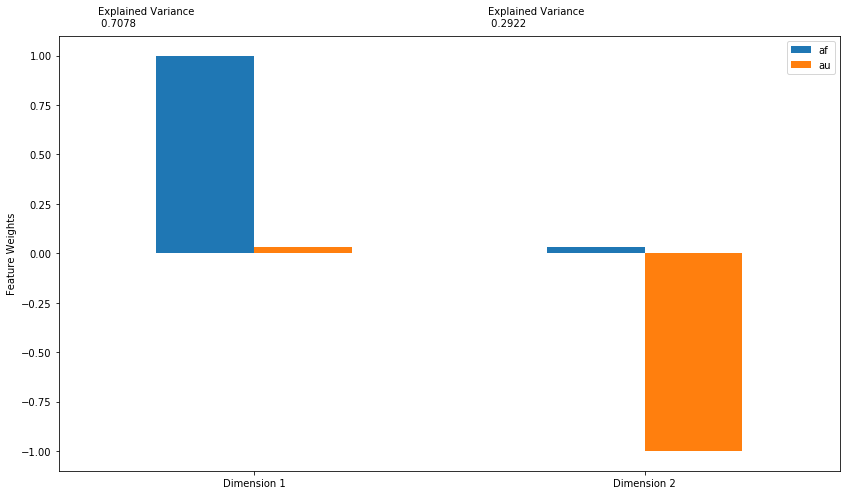

In [8]:
def pca_results(data, pca):
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(dataset, pca)
plt.savefig("robust_scale_dataset.png")

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

X = dataset_r

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print("클러스터 레이블: \n{}".format(kmeans.labels_))
y_kmeans = kmeans.predict(X)
print(y_kmeans)

클러스터 레이블: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [11]:
Xr = dataset_r
X = dataset

kmeans_r = KMeans(n_clusters=2)
kmeans_r.fit(Xr)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
print("Cluster label: \n{}".format(kmeans_r.labels_))
y_kmeans_r = kmeans_r.predict(Xr)
print(y_kmeans_r)

Cluster label: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [13]:
print("Clustser label: \n{}".format(kmeans.labels_))
y_kmeans = kmeans.predict(X)
print(y_kmeans)

Clustser label: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

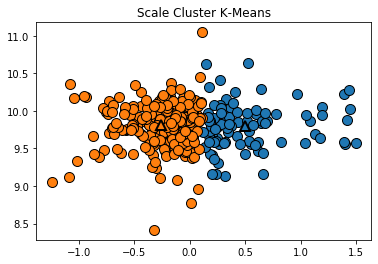

In [14]:
import mglearn

# K-Means with sklearn-scale
mglearn.discrete_scatter(X.values[:, 0], X.values[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1], markers='^', markeredgewidth=2)

plt.title("Scale Cluster K-Means")
plt.savefig("scale_cluster.png")

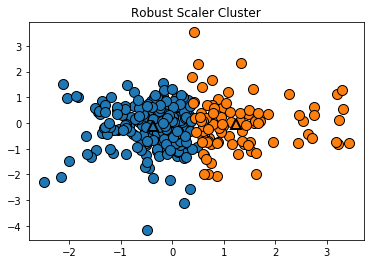

In [15]:
# K-Means with Robust Scale
mglearn.discrete_scatter(Xr.values[:, 0], Xr.values[:, 1], kmeans_r.labels_, markers='o')
mglearn.discrete_scatter(kmeans_r.cluster_centers_[:, 0], kmeans_r.cluster_centers_[:, 1], [0, 1], markers='^', markeredgewidth=2)
plt.title("Robust Scaler Cluster")
plt.savefig("robust_scale_cluster.png")

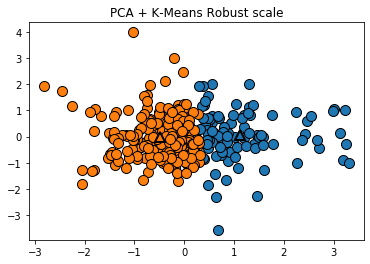

In [42]:
# K-Means with reduced dimension data set that applied with Robust Scale dataset
data = dataset_r
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
# pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
X = reduced_data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

mglearn.discrete_scatter(X.values[:, 0], X.values[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1], markers='^', markeredgewidth=2)
plt.title("PCA + K-Means Robust scale")
plt.savefig("scale_pca_kmeans.png")

Text(0.5, 1.0, 'DBSCAN')

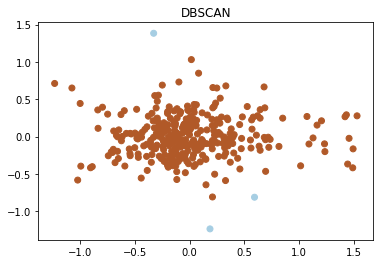

In [43]:
from sklearn.cluster import DBSCAN 
# K-Means with reduced dimension data set that applied with Robust Scale dataset
data = dataset
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
# pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
X = reduced_data

# eps = 0.1, min_samples=1
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan.fit(X)
y_pred = dbscan.fit_predict(X)
plt.scatter(X.values[:,0], X.values[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

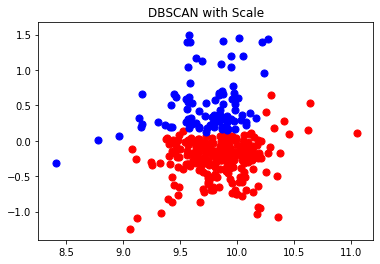

In [44]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#Cluster Model
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(dataset)
labels = model.labels_

plt.scatter(dataset.values[labels==0, 0], dataset.values[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(dataset.values[labels==1, 0], dataset.values[labels==1, 1], s=50, marker='o', color='blue')
plt.title("DBSCAN with Scale")
plt.savefig("DBSCAN")

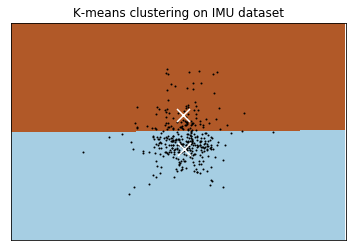

In [47]:
# K-Means with reduced dimension data set that applied with Robust Scale dataset
data = dataset
# pca = PCA(n_components=2).fit(data)
# reduced_data = pca.transform(data)
# pca_samples = pca.transform(data)
# reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
X = dataset
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

h = .02

x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X.values[:, 0], X.values[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on IMU dataset')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()